In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import vtk

In [4]:
n = 4
h = 1 / n

In [5]:
h

0.25

In [6]:
delta = 2 * h
delta

0.5

In [7]:
xcrack = 6-h

In [8]:
xcrack

5.75

In [9]:
ycrack=4

In [10]:
xarea = np.array([0,10,10,0,0])
yarea = np.array([0,0,10,10,0])

In [11]:
xstart = 4 / 100
xareaPD = np.array([xstart,0.1,0.1,xstart,xstart]) * 100
yareaPD = np.array([0.03,0.03,0.07,0.07,0.03]) * 100

In [12]:
startx = 4

In [13]:
x = []
y = []
volume = []
for j in range(0,int(ycrack/h)+1):
    for i in range(0,int(xcrack/h)-1):
        x.append(startx+i*h)
        y.append(3+j*h)
        if i == 0 or i == int(xcrack/h)-2 or j == 0 or j == int(ycrack/h) :
            volume.append(h*h/2)
        else:
            volume.append(h*h)
        
    

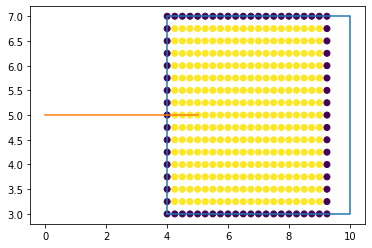

In [14]:
plt.plot(xareaPD,yareaPD)
plt.plot([0.,5],[5,5])
plt.scatter(x,y,c=volume)
#plt.savefig("mesh.pdf")

In [15]:
min(x)

4.0

In [16]:
min(y)

3.0

In [17]:
max(x)

9.25

In [18]:
max(y)

7.0

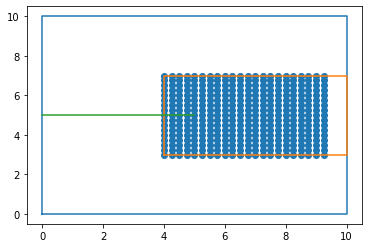

In [19]:
plt.plot(xarea,yarea)
plt.plot(xareaPD,yareaPD)
plt.plot([0.0,5],[5,5])
plt.scatter(x,y)

In [20]:
writer = vtk.vtkXMLUnstructuredGridWriter()
writer.SetFileName("coupling_"+str(n)+".vtu")
grid = vtk.vtkUnstructuredGrid()
points = vtk.vtkPoints()
points.SetNumberOfPoints(len(x))
points.SetDataTypeToDouble()

for i in range(0,len(x)):
    points.InsertPoint(i,x[i],y[i],0.)
    
grid.SetPoints(points)


dataOut = grid.GetPointData()
array = vtk.vtkDoubleArray()
array.SetName("Volumes")
array.SetNumberOfComponents(1)
array.SetNumberOfTuples(len(x))

for i in range(0,len(x)):
    array.SetTuple1(i,volume[i])
dataOut.AddArray(array)


writer.SetInputData(grid)
writer.GetCompressor().SetCompressionLevel(0)
writer.SetDataModeToAscii()
writer.Write()

1

In [21]:
%%bash 
ls

256
64
construct-aligned-mesh.ipynb
coupling_16.vtk
coupling_256.vtk
coupling_4.vtu
coupling_64.vtk
Full_mesh.ipynb
input-base.yaml
mesh.pdf
misisng.png
msh_256.vtk
pum_mesh_coupling_256_step_86_boundary_u_top_and_bot_crack_growth_step_1.vtu
pum_mesh_coupling_64_step_86_boundary_u_top_and_bot_crack_growth_step_1.vtu


In [22]:
import meshio

In [23]:
points = []
cells = []
for i in range(0,len(x)):
    points.append([x[i],y[i],0])
    cells.append(("vertex", [[i]]))

In [24]:
mesh = meshio.Mesh(
    points,
    cells,
    # Optionally provide extra data on points, cells, etc.
    point_data={"Volume": volume},
    # Each item in cell data must match the cells array
)
mesh.write(
    "coupling_"+str(n)+".vtk",  # str, os.PathLike, or buffer/open file
    # file_format="vtk",  # optional if first argument is a path; inferred from extension
)

In [25]:
%%bash 
ls

256
64
construct-aligned-mesh.ipynb
coupling_16.vtk
coupling_256.vtk
coupling_4.vtk
coupling_4.vtu
coupling_64.vtk
Full_mesh.ipynb
input-base.yaml
mesh.pdf
misisng.png
msh_256.vtk
pum_mesh_coupling_256_step_86_boundary_u_top_and_bot_crack_growth_step_1.vtu
pum_mesh_coupling_64_step_86_boundary_u_top_and_bot_crack_growth_step_1.vtu


In [26]:
mesh = meshio.read(
    "coupling_"+str(n)+".vtk",  # string, os.PathLike, or a buffer/open file
    # file_format="stl",  # optional if filename is a path; inferred from extension
    # see meshio-convert -h for all possible formats
)